In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2021년 1월부터 6월까지 데이터
df1 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202101_202106).csv', encoding='cp949')

# 2021년 7월부터 12월까지 데이터
df2 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202107_202112).csv', encoding='cp949')

# 두 데이터프레임을 병합
df = pd.concat([df1, df2], ignore_index=True)

# 병합된 데이터프레임 출력
df

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,인천,김포,운양동 전원마을월드2단지,급속01,1547,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44
1,인천,시흥,LH퍼스트리움 아파트,완속03,3143,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38
2,남서울,강남,LH강남힐스테이트,급속01,6452,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33
3,강원,강릉,알펜시아리조트,급속02,6681,강원도 평창군 대관령면 솔봉로 325,급속,50.0,39.12,0,53,2021-01-01,2021-01-01 16:12:09,2021-01-01 17:05:27
4,대전세종충남,서대전,대전시립연정국악원 주차장,급속02,6175,대전광역시 서구 둔산대로 181,급속,50.0,30.42,0,42,2021-01-01,2021-01-01 23:14:50,2021-01-01 23:57:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,인천,부천,행복한마을 서해아파트,완속02,8628,"경기도 부천시 상동로 57 (상동, 행복한마을 서해그랑블)",완속,7.0,9.59,2,4,2021-10-17,2021-10-17 18:37:16,2021-10-17 20:41:57
2097146,제주,서귀포,서귀포지사,급속02,8819,제주특별자치도 서귀포시 신중로 56,급속,50.0,67.99,2,18,2021-10-17,2021-10-17 18:24:50,2021-10-17 20:43:29
2097147,경기북부,고양,홈플러스 고양터미널점,급속01,5886,경기도 고양시 일산동구 중앙로 1036,급속,50.0,0.17,0,1,2021-10-17,2021-10-17 13:25:21,2021-10-17 13:26:55
2097148,강원,강원직할,롯데캐슬 스카이클래스,완속03,6163,강원도 춘천시 방송길 70,완속,7.0,5.90,1,47,2021-10-17,2021-10-17 11:38:47,2021-10-17 13:26:19


In [3]:
df = df.drop('충전기ID', axis=1)
df[['시', '구', '도로명주소']] = df['주소'].str.split(' ', n=2, expand=True)
df.head(3)

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,인천,김포,운양동 전원마을월드2단지,급속01,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44,경기도,김포시,전원로 44
1,인천,시흥,LH퍼스트리움 아파트,완속03,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38,경기도,시흥시,동서로 1068 (조남동)
2,남서울,강남,LH강남힐스테이트,급속01,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33,서울특별시,강남구,자곡동 자곡로3길 21


In [4]:
gwangju = df[df['시'] == '광주광역시']
gwangju = gwangju.drop_duplicates().reset_index(drop=True)
gwangju

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광주광역시,광산구,"수완로33번길 22 (수완동, 수완1차우미린아파트)"
1,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,광주광역시,북구,장운길 55 (장등동)
2,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,광주광역시,남구,"서문대로824번길 10 (주월동, (구)광주보훈병원)"
3,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,광주광역시,북구,장운길 55 (장등동)
4,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,광주광역시,북구,"설죽로 595 (일곡동, 롯데아파트)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78656,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.5500,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,광주광역시,서구,불암길 154 (매월동)
78657,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.4900,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,광주광역시,북구,장운길 55 (장등동)
78658,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.7800,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광주광역시,광산구,"장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)"
78659,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.9900,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,광주광역시,서구,불암길 154 (매월동)


In [7]:
# 시간별 구별 총충전량
gwangju['충전시작시각'] = pd.to_datetime(gwangju['충전시작시각'])

# 시간별, 구별 충전량 계산
hourcharge = gwangju.groupby([gwangju['충전시작시각'].dt.hour, gwangju['구']])['충전량'].sum()

hourcharge_df = pd.DataFrame({'시간': [i[0] for i in hourcharge.index],
                                       '구': [i[1] for i in hourcharge.index],
                                       '충전량': hourcharge.values})
hourcharge_df

,시간,구,충전량
0,0,광산구,7683.4170
1,0,남구,3031.3700
2,0,동구,1123.4200
3,0,북구,4641.7784
4,0,서구,3689.7190
...,...,...,...
115,23,광산구,14745.2238
116,23,남구,10170.0600
117,23,동구,2388.6500
118,23,북구,67200.2110


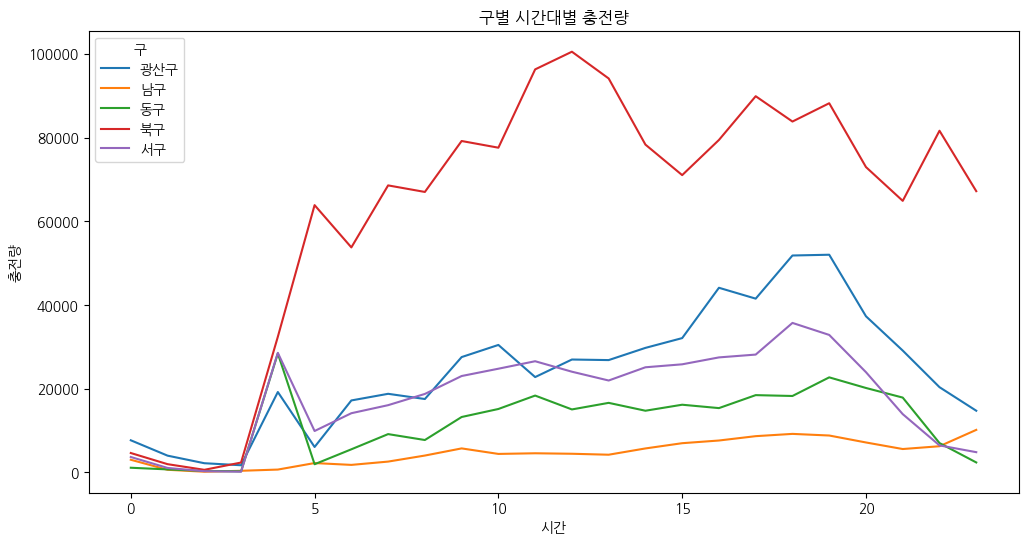

In [8]:
mart_hourly_pivot = hourcharge_df.pivot_table(values='충전량', index='시간', columns='구', aggfunc='sum')

mart_hourly_pivot.plot(kind='line', figsize=(12,6))
plt.xlabel('시간')
plt.ylabel('충전량')
plt.title('구별 시간대별 충전량')
plt.show()

In [17]:
# 일자별 총충전량
gwangju['충전종료일자'] = pd.to_datetime(gwangju['충전종료일자'])

# 일자별, 구별 충전량 계산
daily_charge = gwangju.groupby([gwangju['충전종료일자'].dt.date, gwangju['구']])['충전량'].sum()

# 일자 컬럼 추가
daily_charge_df = pd.DataFrame({'일자': [i[0] for i in daily_charge.index],
                                '구': [i[1] for i in daily_charge.index],
                                '충전량': daily_charge.values})

# 월별 컬럼 추가
daily_charge_df['월'] = daily_charge_df['일자'].apply(lambda x: x.month)

# 월별 컬럼에 일자별 충전량 매핑
monthly_charge = daily_charge_df.groupby(['월', '구'])['충전량'].sum().unstack()


# 인접한 월 (5월 및 7월)의 평균 값을 사용하여 6월의 데이터를 계산
estimated_june = ((monthly_charge.loc[5] + monthly_charge.loc[7]) / 2)

# 6월 데이터를 원래 데이터프레임에 추가
monthly_charge.loc[6] = estimated_june

# 월별 인덱스를 정렬
monthly_charge = monthly_charge.sort_index()

monthly_charge
# 월별 구별 총충전량

구,광산구,남구,동구,북구,서구
월,,,,,
1,78534.2958,13575.390,42836.75330,209974.4091,56789.5800
2,57345.3260,13108.250,37168.42400,177832.5147,50526.0300
3,61967.6272,15268.890,35947.33210,186133.9058,54902.2920
4,61060.8065,13780.050,30558.79240,169055.4662,49813.8400
5,29575.8884,5260.190,15064.45840,81796.5595,24457.5600
6,55943.6985,11901.885,26393.10415,147279.9239,41648.6885
7,82311.5086,18543.580,37721.74990,212763.2883,58839.8170
8,83149.7335,15974.560,35708.20000,198688.1689,57510.3430
9,80935.2428,12257.410,32595.43750,182617.3693,53021.3890


In [18]:
monthly_charge_2021 = pd.read_csv('광주광역시_전기차_충전소_월별_충전량_20210914.csv', index_col=0, encoding='cp949')
monthly_charge_2021.columns.name = '구'
monthly_charge_2021.index.name = '월'

monthly_charge_2021['년'] = 2021
monthly_charge_2021 = monthly_charge_2021.reset_index().set_index(['년', '월'])

monthly_charge_2021

구               광산구         남구           동구           북구          서구
년    월                                                              
2021 1   78534.2958  13575.390  42836.75330  209974.4091  56789.5800
     2   57345.3260  13108.250  37168.42400  177832.5147  50526.0300
     3   61967.6272  15268.890  35947.33210  186133.9058  54902.2920
     4   61060.8065  13780.050  30558.79240  169055.4662  49813.8400
     5   29575.8884   5260.190  15064.45840   81796.5595  24457.5600
     6   55943.6985  11901.885  26393.10415  147279.9239  41648.6885
     7   82311.5086  18543.580  37721.74990  212763.2883  58839.8170
     8   83149.7335  15974.560  35708.20000  198688.1689  57510.3430
     9   80935.2428  12257.410  32595.43750  182617.3693  53021.3890
     10  47088.8510   7525.880  19389.13000  101491.0970  31629.8930

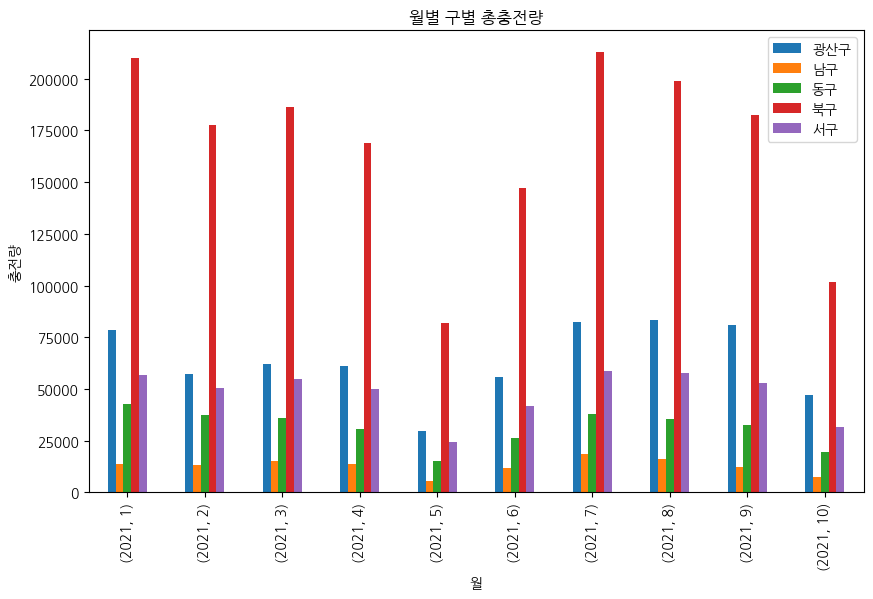

In [20]:
monthly_charge_2021.plot(kind='bar', figsize=(10, 6))
plt.title('월별 구별 총충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.legend(loc='best')
plt.show()

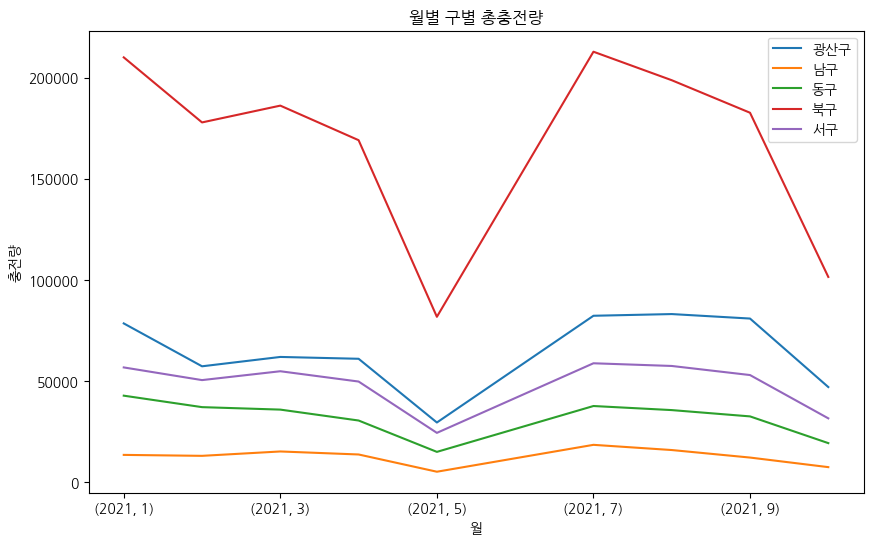

In [26]:
monthly_charge_2021.plot(kind='line', figsize=(10, 6))
plt.title('월별 구별 총충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='구', ylabel='충전량'>

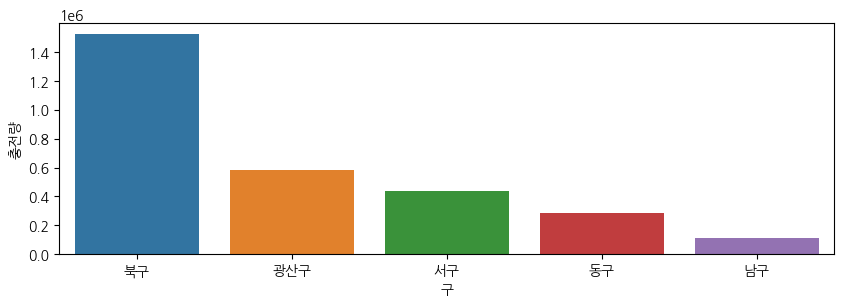

In [21]:
# 구별 충전량
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)
gwangju_gu = gwangju_gu.reset_index()
gwangju_gu
plt.figure(figsize=(10,3))
sns.barplot(data=gwangju_gu,x='구',y='충전량')

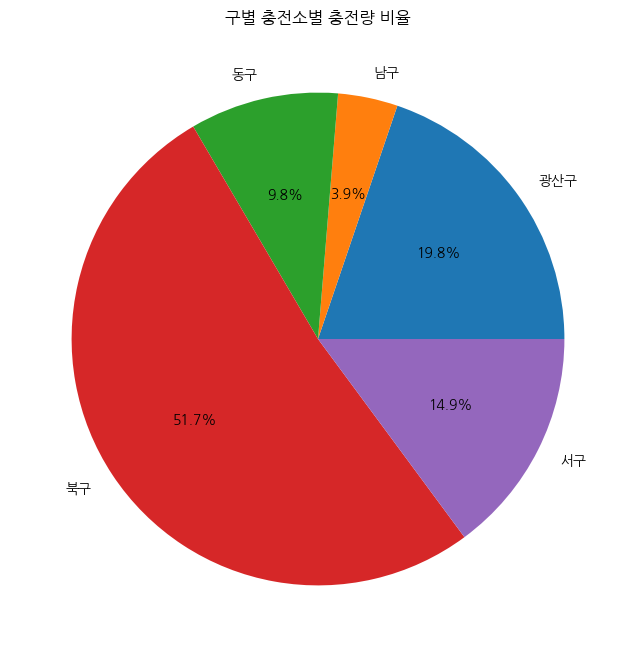

In [22]:
# 구별 충전량 비율
df_charge = gwangju[['구', '충전량']]
df_charge_sum = df_charge.groupby('구').sum()

df_charge_sum.plot(kind='pie', y='충전량', legend=False, autopct='%1.1f%%', figsize=(8,8))
plt.title('구별 충전소별 충전량 비율')
plt.ylabel('')
plt.show()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("구별 총 충전량 비율", "구별 총 충전량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 'gwangju' 데이터프레임에서 '구'별 '충전량' 합계를 계산합니다.
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)

# 'gwangju_gu' 데이터프레임을 subfig에 추가합니다.
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)

bar_trace = go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False,
                   marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']))
subfig.add_trace(bar_trace, 1, 2)

subfig.update_layout(template="plotly_dark", title='2021년 구별 총 충전량')
subfig.show()